In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import os
print(os.getcwd())

F:\Coders\Internship\CODSOFT


In [4]:
train_data = pd.read_csv("Genre Classification Dataset/train_data.txt", delimiter=':::', header=None, engine='python')
test_data = pd.read_csv("Genre Classification Dataset/test_data.txt", delimiter=':::', header=None, engine='python')
test_data_solution = pd.read_csv("Genre Classification Dataset/test_data_solution.txt", delimiter=':::', header=None, engine='python')

In [5]:
#Viewing test data
print("shape",train_data.shape)

shape (54214, 4)


In [6]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
#Viewing test solution data

In [8]:
print("shape",test_data_solution.shape)

shape (54200, 4)


In [9]:
test_data_solution.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [22]:
# Concatenate train and test data
df = pd.concat([train_data, test_data_solution])
# Renaming columns
df.columns = ["id", "Title", "Genre", "Description"]
print(df.head())

   id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [11]:
#Handling Missing Data
print(df.isnull().sum())

id             0
Title          0
Genre          0
Description    0
dtype: int64


In [12]:
#Text Data Processing
import string

# Lowercase text
df['Description'] = df['Description'].str.lower()

# Remove punctuation
df['Description'] = df['Description'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# Tokenization (split text into words)
df['Description'] = df['Description'].apply(lambda x: x.split())

In [17]:
#Import Stopwords

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deeps\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
#Import Lemmatizer

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Description'] = df['Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deeps\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df = pd.get_dummies(df, columns=['Genre'])

In [24]:
#Train Test Split

from sklearn.model_selection import train_test_split

X = df['Description']
y = df.drop(['id', 'Title', 'Description'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.head()

,id,Title,Description,Genre_ action,Genre_ adult,Genre_ adventure,Genre_ animation,Genre_ biography,Genre_ comedy,Genre_ crime,...,Genre_ news,Genre_ reality-tv,Genre_ romance,Genre_ sci-fi,Genre_ short,Genre_ sport,Genre_ talk-show,Genre_ thriller,Genre_ war,Genre_ western
0,1,Oscar et la dame rose (2009),Listening in to a conversation between his do...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Cupid (1997),A brother and sister with a past incestuous r...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,The Secret Sin (1915),To help their unemployed father make ends mee...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,The Unrecovered (2007),The film's title refers not only to the un-re...,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


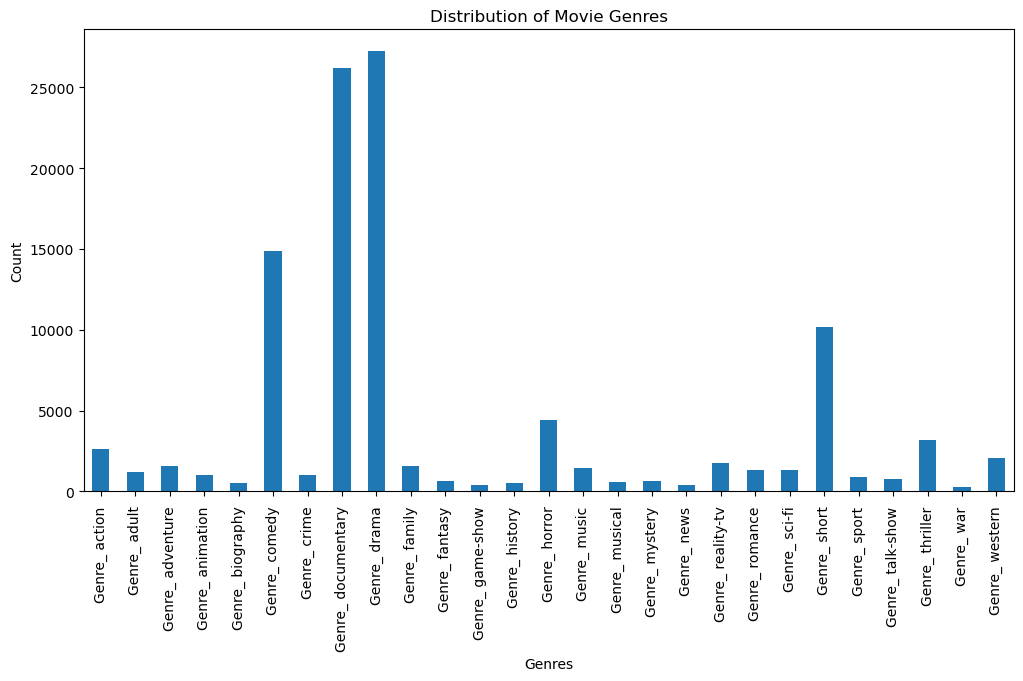

In [25]:
#Histogram and Bar Charts

import matplotlib.pyplot as plt

# Extracting genre columns for analysis
genre_columns = df.columns[3:]  # Selecting columns related to movie genres

# Calculating genre counts for visualization
genre_counts = df[genre_columns].sum()

# Creating a bar chart to visualize the distribution of movie genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
column_names = df.columns
print(column_names)


Index(['id', 'Title', 'Description', 'Genre_ action ', 'Genre_ adult ',
       'Genre_ adventure ', 'Genre_ animation ', 'Genre_ biography ',
       'Genre_ comedy ', 'Genre_ crime ', 'Genre_ documentary ',
       'Genre_ drama ', 'Genre_ family ', 'Genre_ fantasy ',
       'Genre_ game-show ', 'Genre_ history ', 'Genre_ horror ',
       'Genre_ music ', 'Genre_ musical ', 'Genre_ mystery ', 'Genre_ news ',
       'Genre_ reality-tv ', 'Genre_ romance ', 'Genre_ sci-fi ',
       'Genre_ short ', 'Genre_ sport ', 'Genre_ talk-show ',
       'Genre_ thriller ', 'Genre_ war ', 'Genre_ western '],
      dtype='object')
